In [3]:
# importing python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [4]:
# importing csv file
df = pd.read_csv(r'C:\Users\Sourabh Hiremath\Desktop\Python\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [5]:
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
# checking for blank columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#droping unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
#checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
# droping null values
df.dropna(inplace=True)

In [12]:
# changing data type
df['Amount'] = df['Amount'].astype('int')

In [13]:
df['Amount'].dtypes

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
# checking description of the data in the DataFrame (i.e. count, mean, std, etc) for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

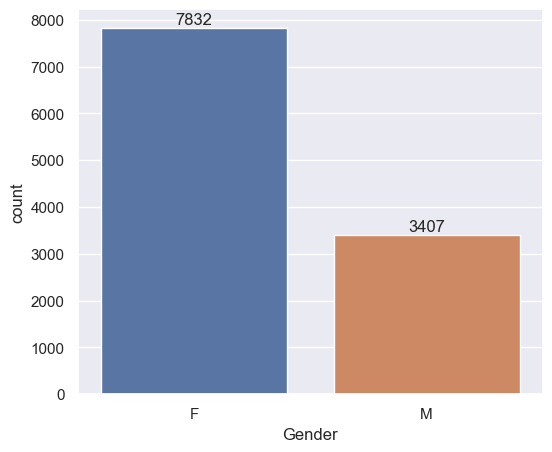

In [87]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [48]:
# amount spent by each gender 
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

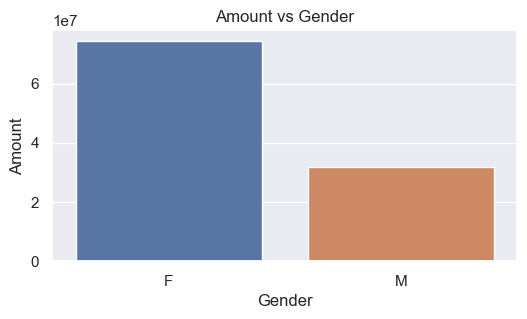

In [56]:
# plotting a bar chart for gender vs total amount

plt.figure(figsize=(6, 3))
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.title('Amount vs Gender');

*From above graphs we can see that most of the buyers are females and even the purchasing power of females is greater than men.*

### Age

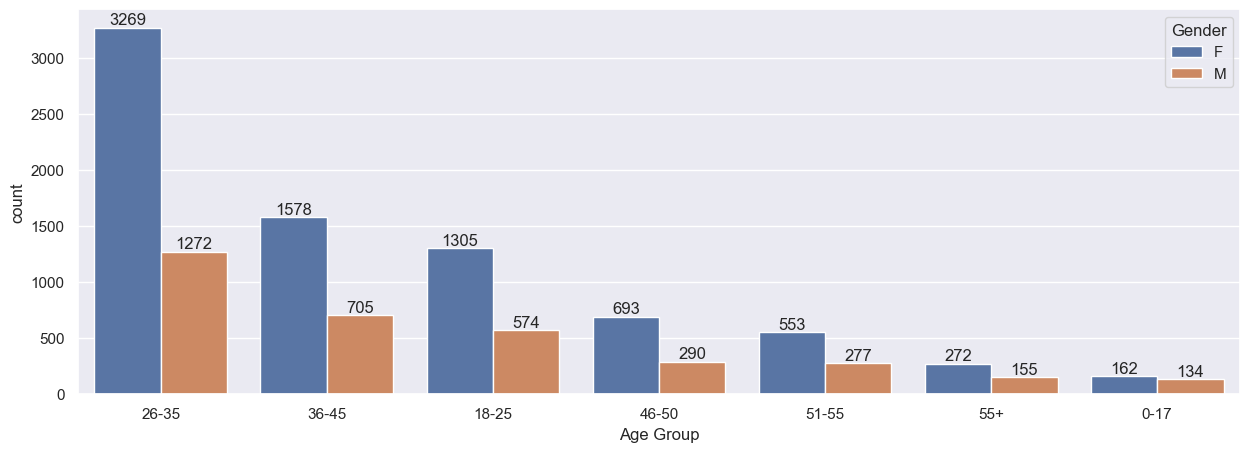

In [64]:
# age count for each gender
ax = sns.countplot(data = df, x = 'Age Group',order=df['Age Group'].value_counts(ascending=False).index,hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

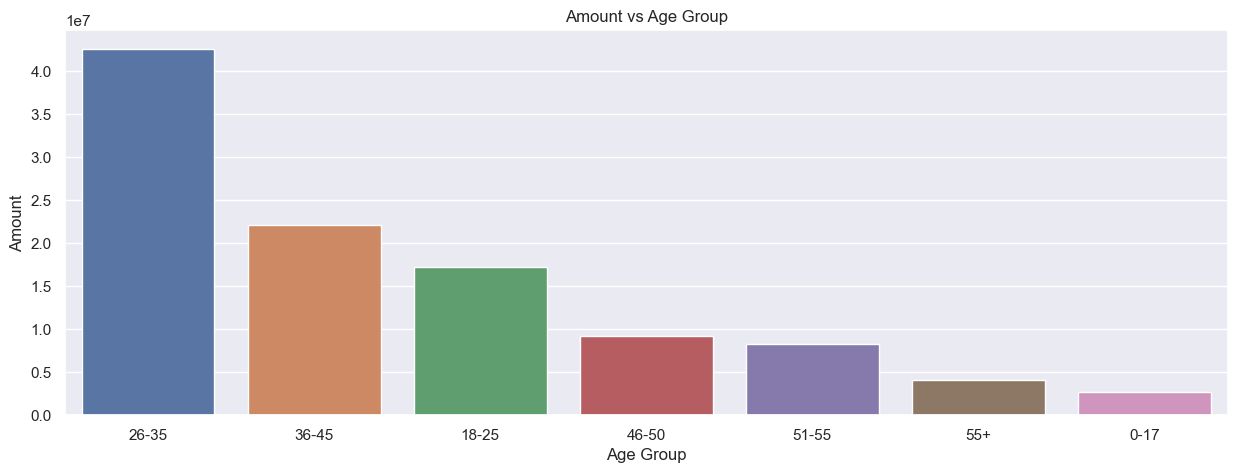

In [65]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.title('Amount vs Age Group');

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.*

### State

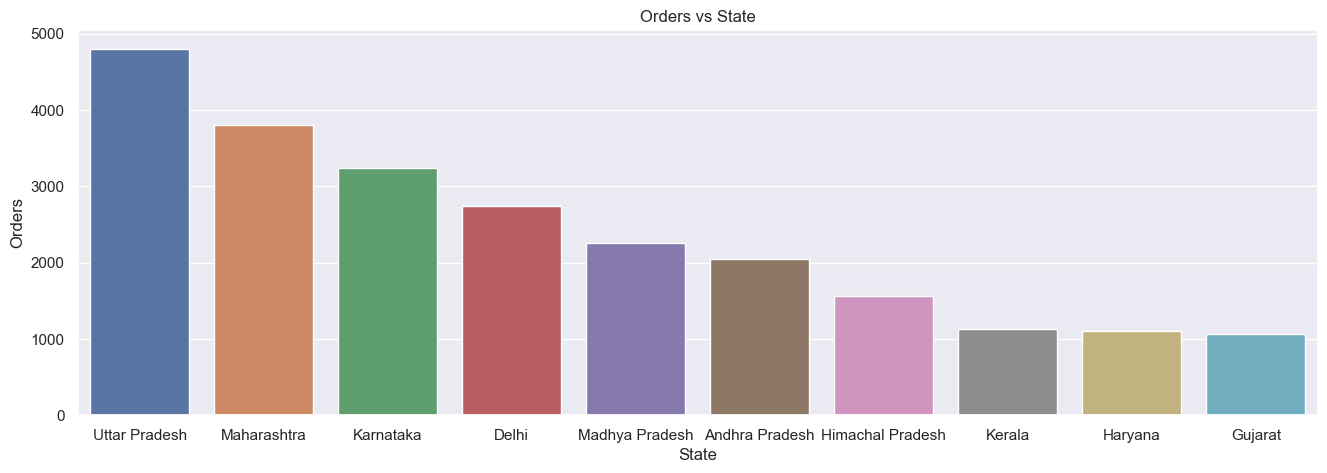

In [76]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.title('Orders vs State')
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders');

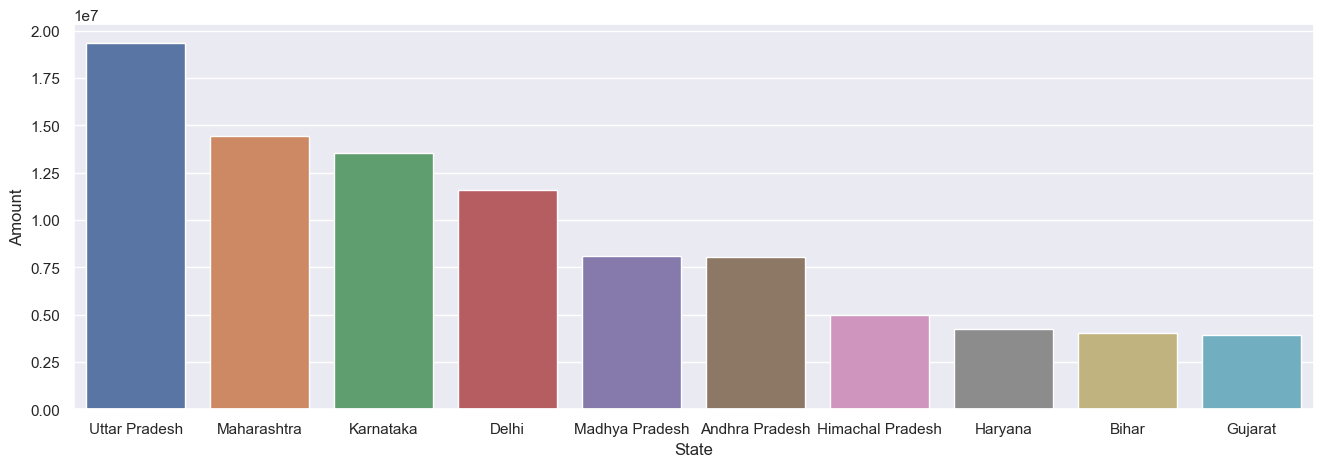

In [75]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount');

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.*


### Marital Status

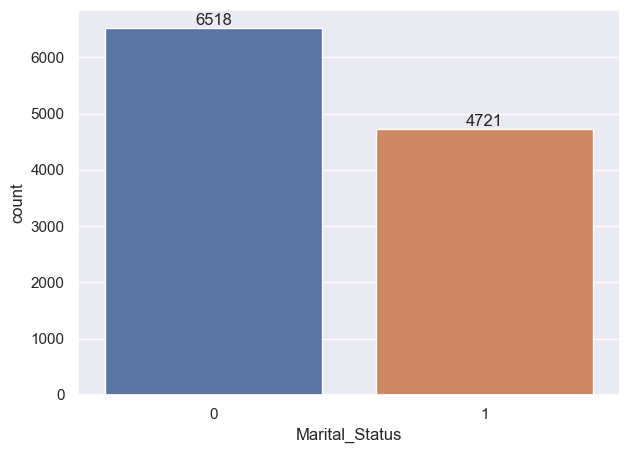

In [80]:
# checking the count of married and unmaaried
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

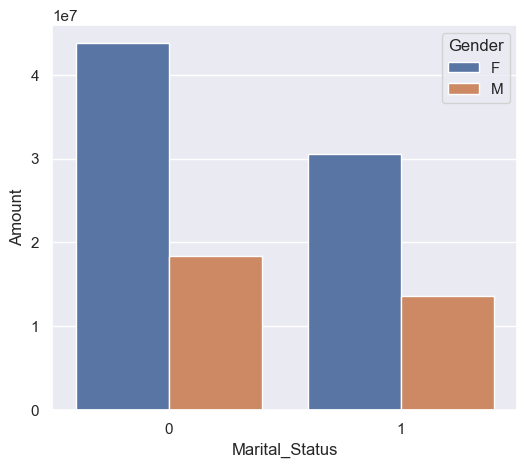

In [86]:
# checking the amount spend by the married and unmarried 

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender');

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

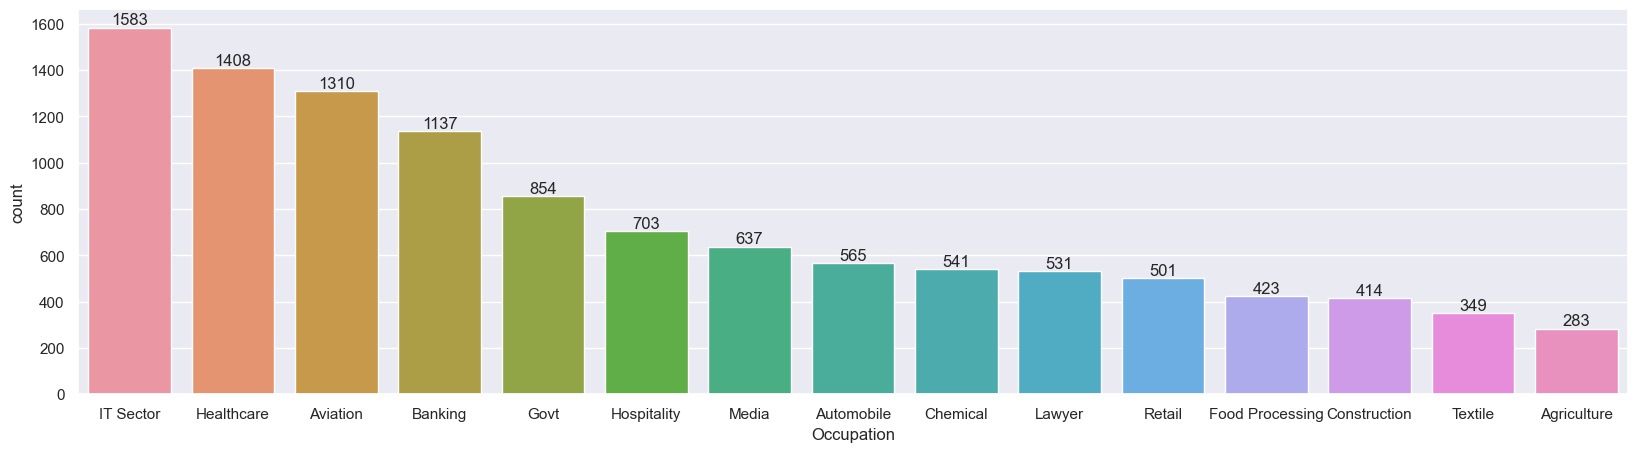

In [78]:
# consumer count based on their occupation 

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',order=df['Occupation'].value_counts(ascending=False).index)

for bars in ax.containers:
    ax.bar_label(bars)

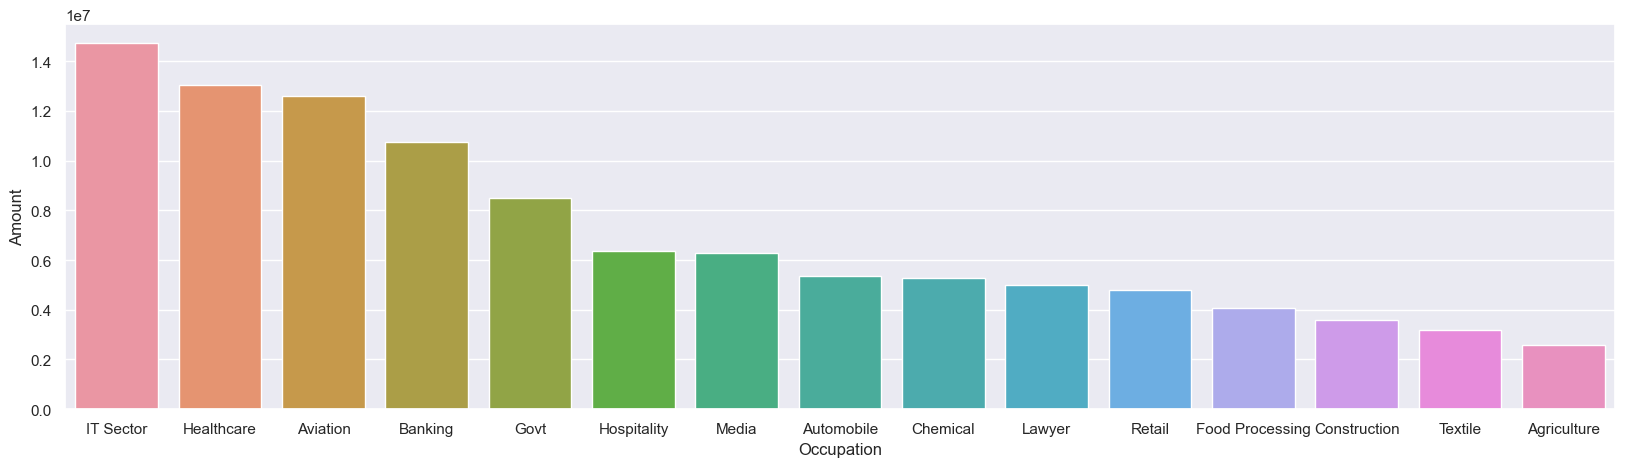

In [83]:
# consumer spending based on their occupation

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount');

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

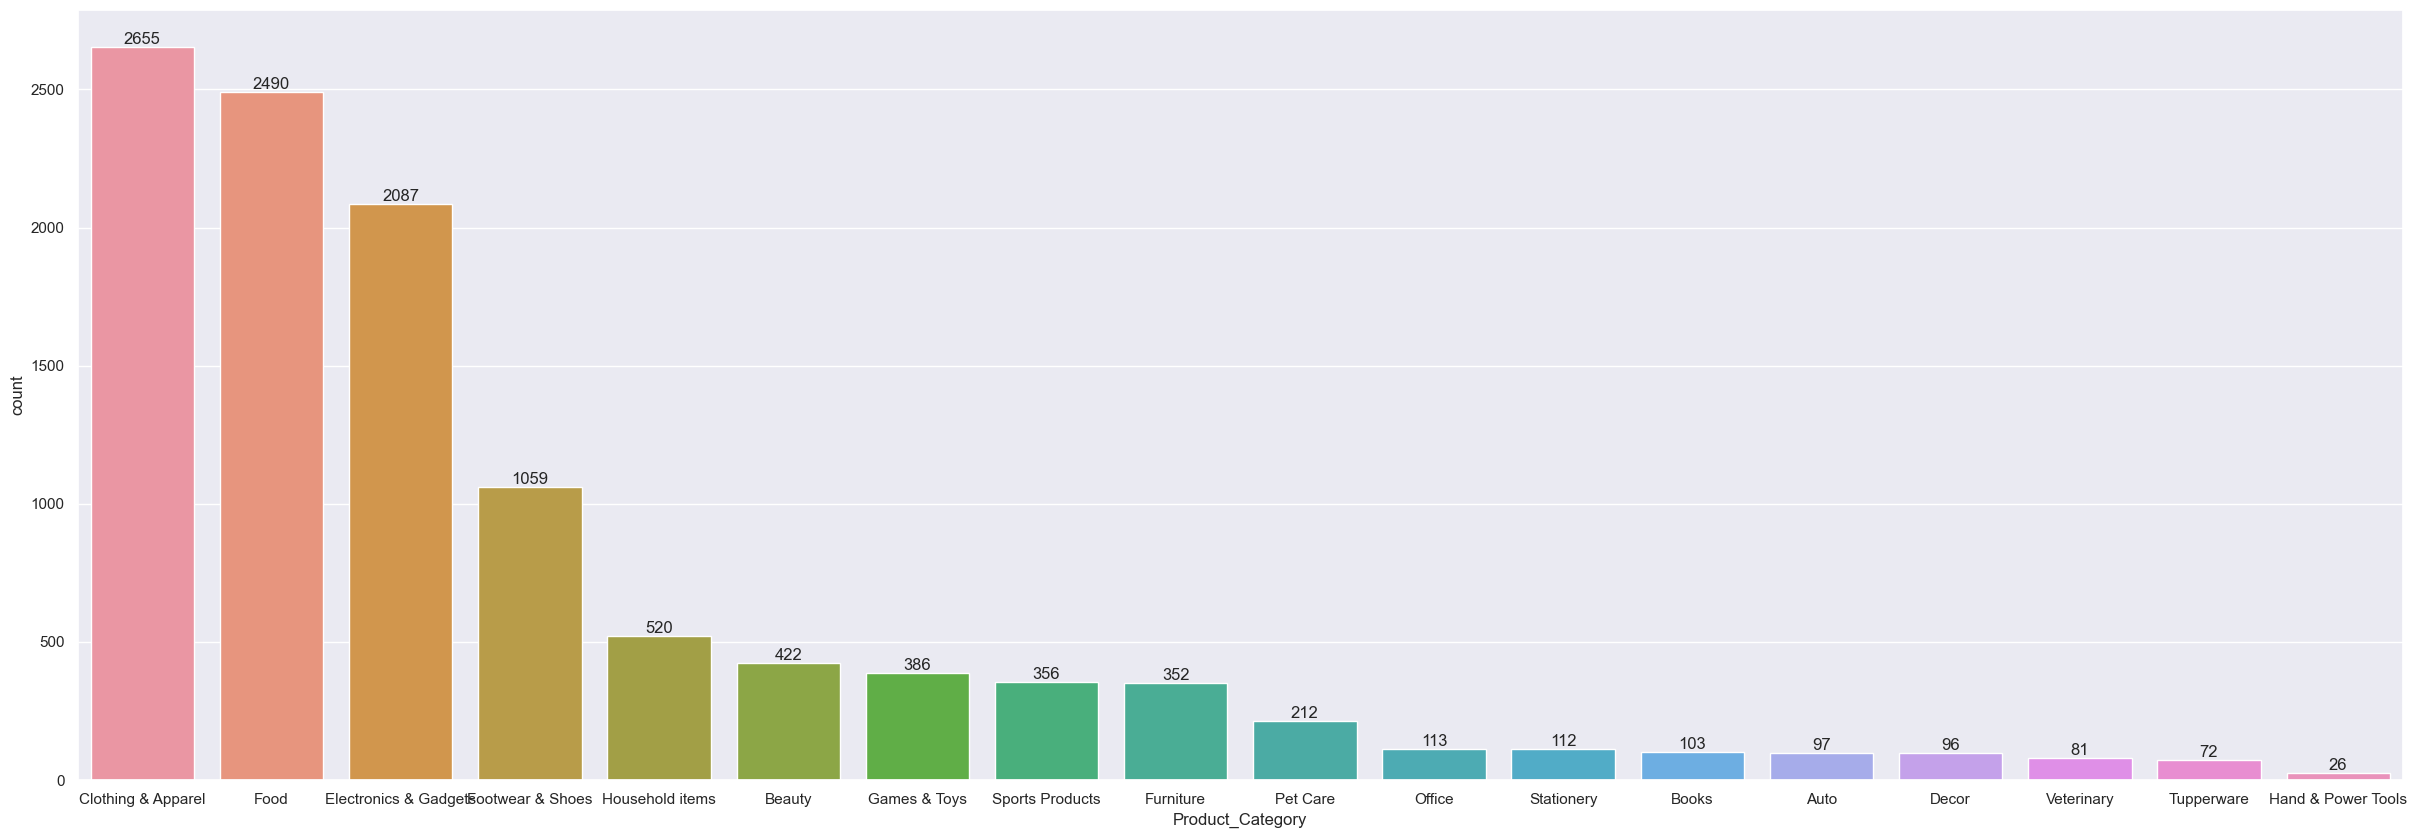

In [100]:
# order count based in the product category

sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(data = df., x = 'Product_Category',order=df['Product_Category'].value_counts(ascending=False).index)

for bars in ax.containers:
    ax.bar_label(bars)

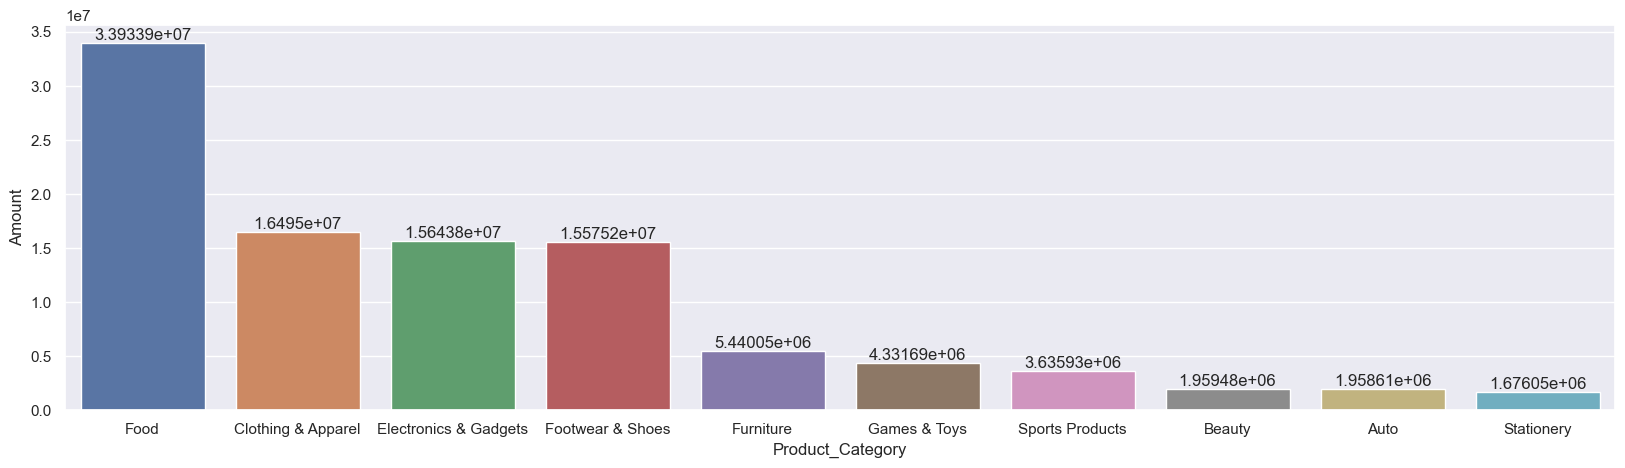

In [24]:
# amount spent on orders based on product category

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount');

for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.Though the orders of clothing is highest but the amount per order is highest or food and almost twice when compared to the amount spend on clothing*

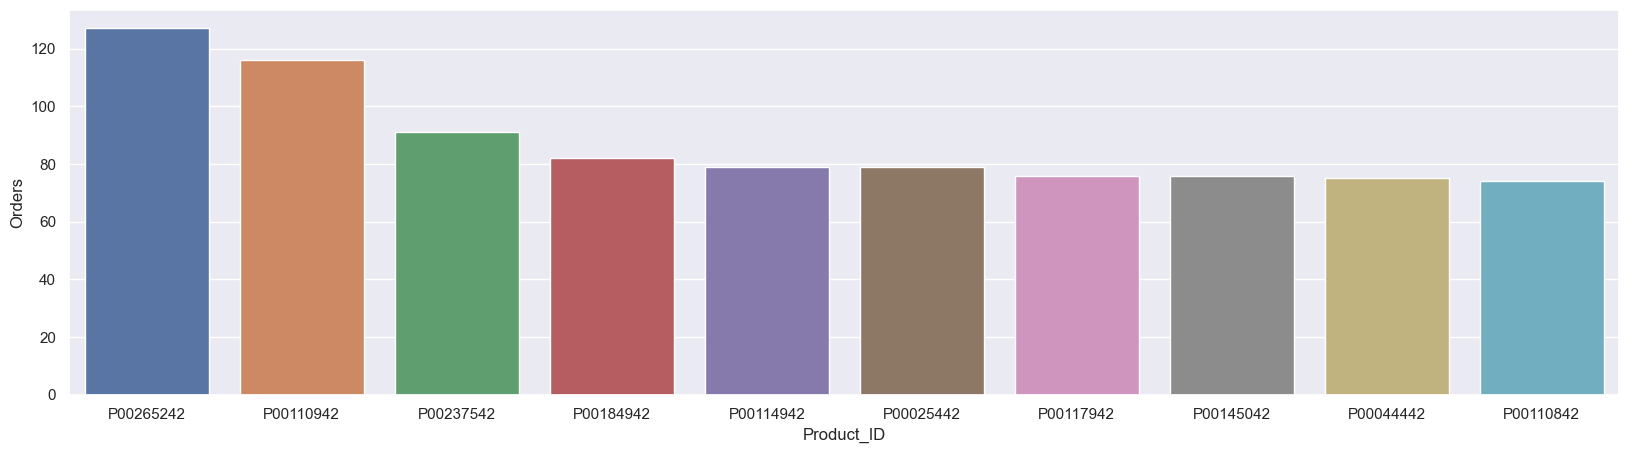

In [104]:
# top 10 most sold products

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders');

## Conclusion:
 

*Married women of age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.*

Thank you!